1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un
cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr²,
donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos
bases circulares.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Fernando Sanchez Cargar el conjunto de datos
df = pd.read_csv('fish.csv')

#Fernando Sanchez  Crear la nueva columna y calcular el volumen 
df['Volume'] = np.pi * (df['Length1']**2) * df['Width']

#Fernando Sanchez Mostrar las primeras filas del DataFrame con la nueva columna
print(df.head())


  Species  Weight  Length1  Length2  Length3   Height   Width        Volume
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200   6797.541936
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056   7791.230206
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961   8427.194371
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555   9681.838136
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  11326.545786


2. Verifica la correlación posible entre las variables, numérica y gráficamente.
¿Aumenta la correlación al añadir el volumen? Explica.


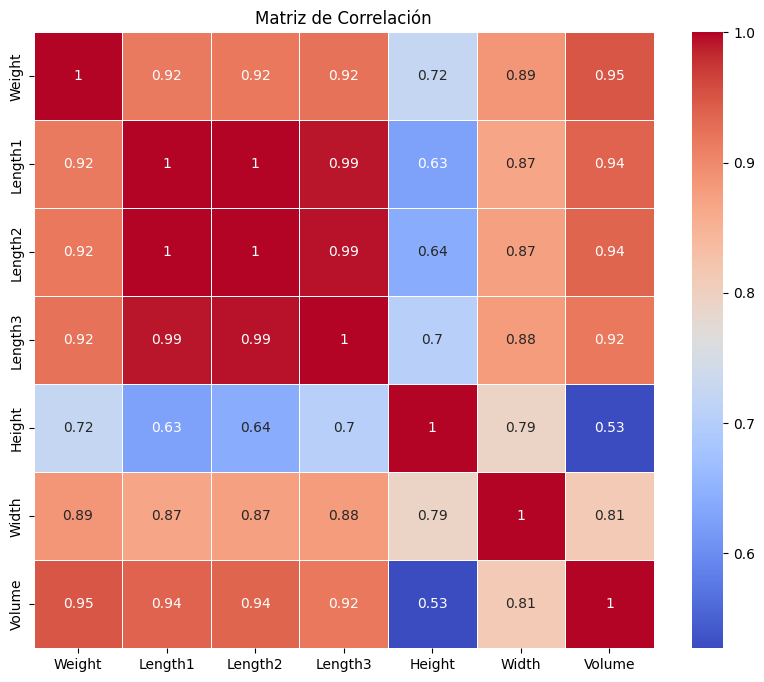

'La correlación del volumen con casi todas las variables excepto el peso es muy cercana al 1 o 1, esto indica que es una alta correlacion.'

In [13]:
#FernandoSanchez Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number])

#FernandoSanchez Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

#FernandoSanchez Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

"""La correlación del volumen con casi todas las variables excepto el peso es muy cercana al 1 o 1, esto indica que es una alta correlacion."""

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los
peces. Realiza una breve evaluación del modelo y grafícalo.


Mean Squared Error: 22545.08495365513
R-squared: 0.8414988892649664


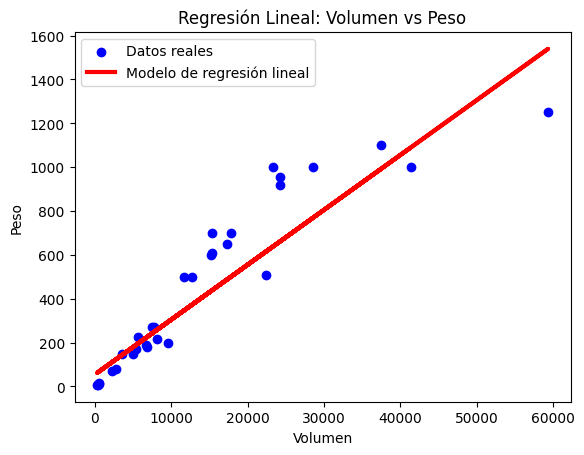

'Podemos observar que el modelo de regresión no está errado ya que la relación peso volumen de\nlos datos reales tienden a apegarse a mi modelo de regresión aunque no siguen con exactitud la linea generada'

In [12]:
#FernandoSanchez Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = df[['Volume']]
y = df['Weight']

#FernandoSanchez Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Inicializar el modelo de regresión lineal
model = LinearRegression()

#FernandoSanchez Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

#FernandoSanchez Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#FernandoSanchez Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#FernandoSanchez Imprimir las métricas de evaluación
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

#FernandoSanchez Graficar el modelo y los datos
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Modelo de regresión lineal')
plt.title('Regresión Lineal: Volumen vs Peso')
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.legend()
plt.show()
"""Podemos observar que el modelo de regresión no está errado ya que la relación peso volumen de
los datos reales tienden a apegarse a mi modelo de regresión aunque no siguen con exactitud la linea generada"""


4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica

In [9]:
#FernandoSanchez Lista para almacenar los resultados por especie
results_by_species = []

#FernandoSanchez Iterar sobre cada especie única en el conjunto de datos
for species in df['Species'].unique():
    #FernandoSanchez Filtrar el conjunto de datos para la especie actual
    species_data = df[df['Species'] == species]

    #FernandoSanchez Seleccionar las variables predictoras (X) y la variable objetivo (y)
    X_species = species_data[['Volume']]
    y_species = species_data['Weight']

    #FernandoSanchez Dividir el conjunto de datos para entrenamiento y prueba
    X_train_species, X_test_species, y_train_species, y_test_species = train_test_split(
        X_species, y_species, test_size=0.2, random_state=42
    )

    #FernandoSanchez Inicializar el modelo de regresión lineal
    model_species = LinearRegression()

    #FernandoSanchez Entrenar el modelo con el conjunto de entrenamiento
    model_species.fit(X_train_species, y_train_species)

    #FernandoSanchez Realizar predicciones en el conjunto de prueba
    y_pred_species = model_species.predict(X_test_species)

    #FernandoSanchez Evaluar el modelo
    mse_species = mean_squared_error(y_test_species, y_pred_species)
    r2_species = r2_score(y_test_species, y_pred_species)

    #FernandoSanchez Almacenar los resultados en la lista
    results_by_species.append({
        'Species': species,
        'Mean Squared Error': mse_species,
        'R-squared': r2_species
    })

#FernandoSanchez Imprimir los resultados por especie
for result in results_by_species:
    print(f"\nSpecies: {result['Species']}")
    print(f"Mean Squared Error: {result['Mean Squared Error']}")
    print(f"R-squared: {result['R-squared']}")

"""Podemos observar que para los datos del pez Bream tenemos que difieren las predicciones del modelo en 9870 unidades al cuadrado del valor real,
tambien sugiere que el modelo explica el 70% de la variabilidad de su peso.
Para el pez Roach tenemos que difiere 1224.76 y explica un 88% de la variabilidad del peso, se podría hacer un mejor ajuste en el modelo.
Para el pez whitefish tenemos que difiere 2625.68 y el modelo no explica la variabilidad del peso, la relacion del peso y volumen no es modelada por una regresión lineal.
Para el pez Parkki tenemos resultados muy bajos de MSE y un R-squared cercano a 1 sugieren un ajuste excelente para Parkki. El modelo explica alrededor del 99% de la variabilidad en el peso.
Para el pez Perch el modelo tiene un buen ajuste, con un R-squared de 0.98, indicando que explica alrededor del 98% de la variabilidad en el peso.
Para el pez Pike aunque el MSE es más alto, el R-squared de 0.96 indica que el modelo explica alrededor del 96% de la variabilidad en el peso.
Por ultimo el pez Smelt resultados con un MSE extremadamente bajo y un R-squared alto sugieren un ajuste casi perfecto. El modelo explica alrededor del 93% de la variabilidad en el peso."""


Species: Bream
Mean Squared Error: 9870.785925819573
R-squared: 0.6952405340946037

Species: Roach
Mean Squared Error: 1224.7600434534716
R-squared: 0.8798098618446941

Species: Whitefish
Mean Squared Error: 2625.6817681142047
R-squared: 0.0

Species: Parkki
Mean Squared Error: 46.695112594723575
R-squared: 0.9941984039681864

Species: Perch
Mean Squared Error: 2828.506162114952
R-squared: 0.9757172956040641

Species: Pike
Mean Squared Error: 13537.77545296797
R-squared: 0.9555233939420876

Species: Smelt
Mean Squared Error: 0.4636373688227111
R-squared: 0.9310291517453818


'Podemos observar que para los datos del pez Bream tenemos que difieren las predicciones del modelo en 9870 unidades al cuadrado del valor real,\ntambien sugiere que el modelo explica el 70% de la variabilidad de su peso.\nPara el pez Roach tenemos que difiere 1224.76 y explica un 88% de la variabilidad del peso, se podría hacer un mejor ajuste en el modelo.\nPara el pez whitefish tenemos que difiere 2625.68 y el modelo no explica la variabilidad del peso, la relacion del peso y volumen no es modelada por una regresión lineal.\nPara el pez Parkki tenemos resultados muy bajos de MSE y un R-squared cercano a 1 sugieren un ajuste excelente para Parkki. El modelo explica alrededor del 99% de la variabilidad en el peso.\nPara el pez Perch el modelo tiene un buen ajuste, con un R-squared de 0.98, indicando que explica alrededor del 98% de la variabilidad en el peso.\nPara el pez Pike aunque el MSE es más alto, el R-squared de 0.96 indica que el modelo explica alrededor del 96% de la variabil

5. Construye un modelo de regresión que relacione dos o más variables con el peso de
los peces. Realiza una breve evaluación del modelo.

In [11]:
#FernandoSanchez Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y = df['Weight']

#FernandoSanchez Dividir el conjunto de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#FernandoSanchez Inicializar el modelo de regresión lineal
model = LinearRegression()

#FernandoSanchez Entrenar el modelo con el conjunto de entrenamiento
model.fit(X_train, y_train)

#FernandoSanchez Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

#FernandoSanchez Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#FernandoSanchez Imprimir las métricas de evaluación
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
"""El modelo parece tener un rendimiento decente al predecir el peso de los peces utilizando las variables seleccionadas. """

Mean Squared Error: 16763.887193140738
R-squared: 0.8821430593048696


'El modelo parece tener un rendimiento decente al predecir el peso de los peces utilizando las variables seleccionadas. '